# Metal Project

Objectives of this project: 
- Scrape all bands from https://www.metal-archives.com/
- Plot what metal bands are where (e.g. # of metal bands per capita) (will come up with more ideas further along)
- Answer the question: Is is true that you can't walk through a forest in Europe without running into a folk metal band? 

# 0 Importing libraries

In [2]:
# basics
import numpy as np
import pandas as pd
import time
import string


# visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# web scraping libraries
import requests
import selenium
from selenium import webdriver
from selenium.webdriver.firefox.options import Options

options = Options()
options.headless = True

alpha = string.ascii_uppercase

# 1 Scraping data

In [138]:
def scrape_bands(url): 
    
    print(f"getting bands from: {url}")
    def get_data(browser): 
        elements = browser.find_elements_by_xpath('//*[contains(@id,"bandListAlpha")]//tr')
        data = [[cell.text for cell in row.find_elements_by_xpath(".//*[self::td or self::th]")]
                       for row in browser.find_elements_by_xpath('//*[contains(@id,"bandListAlpha")]//tr')]
        return data

    browser = webdriver.Firefox(options=options)
    browser.get(url)
    time.sleep(5)

    data = get_data(browser)
    df = pd.DataFrame(data)

    page_num = 1
    print(f"scrapping page {page_num}")
    
    while True: 
        button = browser.find_element_by_xpath('//*[@id="bandListAlpha_next"]')
        if button.get_attribute("class") == "next paginate_button":

            button.click()
            time.sleep(5)
            page_num += 1
            print(f"scrapping page {page_num}")
            data = get_data(browser)
            df = pd.concat([df, pd.DataFrame(data)], ignore_index=True)
        else: 
            break
    browser.quit()
    
    return df

pages = alpha + "\#" + "~"

# Start timer. 
start = time.time()

frames = [scrape_bands("https://www.metal-archives.com/lists/" + page) for page in pages]
bands = pd.concat(frames, ignore_index=True)

print("done :)")
end = time.time()
print(f"time elapsed: {end-start}")

getting bands from: https://www.metal-archives.com/lists/A
scrapping page 1
scrapping page 2
scrapping page 3
scrapping page 4
scrapping page 5
scrapping page 6
scrapping page 7
scrapping page 8
scrapping page 9
scrapping page 10
scrapping page 11
scrapping page 12
scrapping page 13
scrapping page 14
scrapping page 15
scrapping page 16
scrapping page 17
scrapping page 18
scrapping page 19
scrapping page 20
scrapping page 21
scrapping page 22
scrapping page 23
scrapping page 24
scrapping page 25
getting bands from: https://www.metal-archives.com/lists/B
scrapping page 1
scrapping page 2
scrapping page 3
scrapping page 4
scrapping page 5
scrapping page 6
scrapping page 7
scrapping page 8
scrapping page 9
scrapping page 10
scrapping page 11
scrapping page 12
scrapping page 13
scrapping page 14
scrapping page 15
scrapping page 16
scrapping page 17
getting bands from: https://www.metal-archives.com/lists/C
scrapping page 1
scrapping page 2
scrapping page 3
scrapping page 4
scrapping page 5


In [141]:
bands.head()

,0,1,2,3
0,Band,Country,Genre,Status
1,Band,Country,Genre,Status
2,A // Solution,United States,Crust Punk/Thrash Metal,Split-up
3,A B I S M O,Brazil,Doom/Stoner Metal,Active
4,A Balance of Power,United States,Melodic Death Metal/Metalcore,Active


In [1]:
bands.to_csv("bands_not_cleaned.csv")

NameError: name 'bands' is not defined

# 2 Cleaning dataset of metal bands

In [3]:
bands = pd.read_csv("bands_not_cleaned.csv")

In [5]:
bands.head()

,Unnamed: 0,0,1,2,3
0,0,Band,Country,Genre,Status
1,1,Band,Country,Genre,Status
2,2,A // Solution,United States,Crust Punk/Thrash Metal,Split-up
3,3,A B I S M O,Brazil,Doom/Stoner Metal,Active
4,4,A Balance of Power,United States,Melodic Death Metal/Metalcore,Active


In [6]:
bands = bands.rename(columns={'0': 'Band', '1': 'Country', '2': 'Genre', '3': 'Status'})

In [7]:
bands.head()

,Unnamed: 0,Band,Country,Genre,Status
0,0,Band,Country,Genre,Status
1,1,Band,Country,Genre,Status
2,2,A // Solution,United States,Crust Punk/Thrash Metal,Split-up
3,3,A B I S M O,Brazil,Doom/Stoner Metal,Active
4,4,A Balance of Power,United States,Melodic Death Metal/Metalcore,Active


In [9]:
bands = bands.drop('Unnamed: 0', 1)

In [10]:
bands.head()

,Band,Country,Genre,Status
0,Band,Country,Genre,Status
1,Band,Country,Genre,Status
2,A // Solution,United States,Crust Punk/Thrash Metal,Split-up
3,A B I S M O,Brazil,Doom/Stoner Metal,Active
4,A Balance of Power,United States,Melodic Death Metal/Metalcore,Active


In [13]:
bands.loc[0].values

array(['Band', 'Country', 'Genre', 'Status'], dtype=object)

In [16]:
bands = bands.drop(bands[bands['Band']=='Band'].index)

In [17]:
bands.head()

,Band,Country,Genre,Status
2,A // Solution,United States,Crust Punk/Thrash Metal,Split-up
3,A B I S M O,Brazil,Doom/Stoner Metal,Active
4,A Balance of Power,United States,Melodic Death Metal/Metalcore,Active
5,A Band of Orcs,United States,Death/Thrash Metal,Active
6,A Baptism by Fire,Canada,Progressive Power Metal,Active


In [18]:
bands.describe()

,Band,Country,Genre,Status
count,168308,168308,168308,168308
unique,118966,153,9586,6
top,Abaddon,United States,Black Metal,Active
freq,102,35851,21223,93823


In [21]:
bands['Genre'].value_counts()[:50]

Black Metal                      21223
Death Metal                      13669
Heavy Metal                      10898
Thrash Metal                     10841
Melodic Death Metal               4398
Death/Thrash Metal                3781
Black/Death Metal                 3398
Progressive Metal                 3015
Brutal Death Metal                3004
Power Metal                       2660
Death Metal/Grindcore             2384
Thrash/Death Metal                2066
Heavy Metal/Hard Rock             1858
Heavy/Power Metal                 1805
Heavy/Thrash Metal                1600
Raw Black Metal                   1422
Death/Black Metal                 1326
Black/Thrash Metal                1185
Atmospheric Black Metal           1160
Doom Metal                        1159
Gothic Metal                      1151
Thrash Metal/Crossover            1107
Melodic Death Metal/Metalcore     1101
Thrash/Groove Metal               1021
Metalcore                         1006
Melodic Black Metal      

In [22]:
bands[bands['Genre'].str.contains('Folk')]

,Band,Country,Genre,Status
231,A Thousand Winters,Italy,Folk Metal,Active
399,Ab Noctem,Italy,Black/Folk Metal,Split-up
462,Abäk,Costa Rica,Heavy/Folk Metal/Rock,Active
714,Abinchova,Switzerland,Melodic Death/Folk Metal,Split-up
960,Abracadabra,Russia,Folk Metal,Active
...,...,...,...,...
168960,閃靈,Taiwan,Melodic Black/Death/Folk Metal,Active
168966,陰陽座,Japan,Heavy/Folk Metal,Active
168967,雪沉,China,Folk Metal,Active
168970,零壹,China,Extreme/Folk Metal,Active


In [24]:
folk_genres = bands['Genre'][bands['Genre'].str.contains('Folk')].value_counts()

In [32]:
folk_metal_bands = bands[bands['Genre'].str.contains('Folk')]

In [33]:
folk_metal_bands.head()

,Band,Country,Genre,Status
231,A Thousand Winters,Italy,Folk Metal,Active
399,Ab Noctem,Italy,Black/Folk Metal,Split-up
462,Abäk,Costa Rica,Heavy/Folk Metal/Rock,Active
714,Abinchova,Switzerland,Melodic Death/Folk Metal,Split-up
960,Abracadabra,Russia,Folk Metal,Active


In [34]:
folk_metal_bands['Country'].value_counts()

Russia           215
United States    209
Germany          196
Italy            163
Spain            103
                ... 
Mongolia           1
Malta              1
El Salvador        1
Honduras           1
Jordan             1
Name: Country, Length: 93, dtype: int64

In [35]:
folk_metal_bands['Status'].value_counts()

Active          1612
Split-up         475
Unknown          179
On hold           96
Changed name      92
Name: Status, dtype: int64

In [37]:
folk_metal_bands[folk_metal_bands['Band']=='Eluveitie']

,Band,Country,Genre,Status
43303,Eluveitie,Switzerland,"Folk/Melodic Death Metal, Folk",Active


<AxesSubplot:>

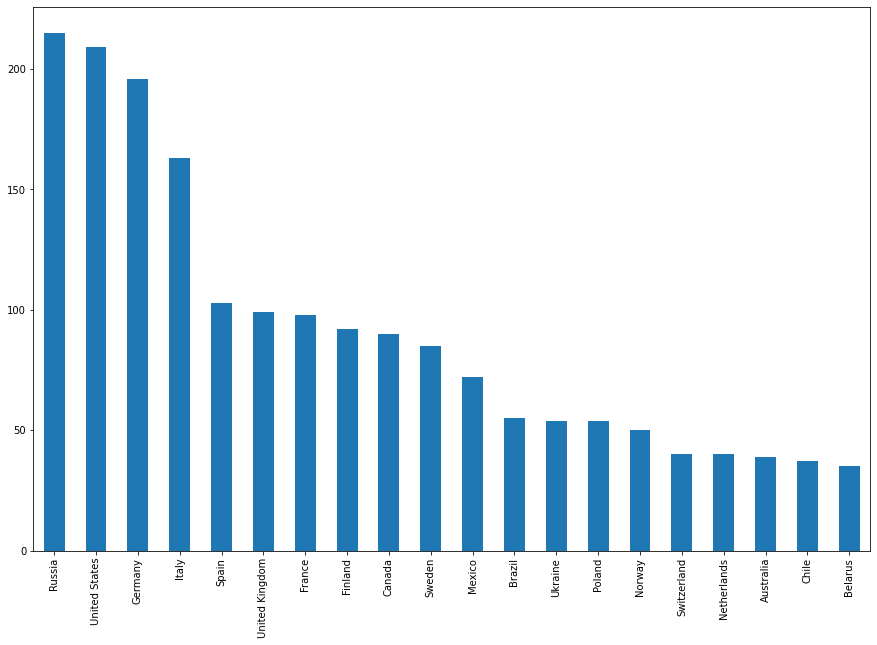

In [48]:
fig, ax = plt.subplots(figsize=[15, 10])
folk_metal_bands['Country'].value_counts().head(20).plot.bar(ax=ax)



In [45]:
num_bands

array([215, 209, 196, 163, 103,  99,  98,  92,  90,  85,  72,  55,  54,
        54,  50,  40,  40,  39,  37,  35,  33,  31,  31,  30,  29,  29,
        28,  25,  24,  23,  23,  21,  21,  19,  18,  16,  14,  14,  11,
        11,  10,  10,  10,  10,   8,   8,   8,   7,   7,   7,   6,   6,
         5,   4,   4,   4,   4,   4,   4,   3,   3,   3,   3,   3,   3,
         2,   2,   2,   2,   2,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1], dtype=int64)

# 3 Visualizations